<a href="https://colab.research.google.com/github/nikhilbansal23/DeliveryMarketModelling/blob/main/Delivery_Market_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [102]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [103]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Delhivery - Delivery Market Modelling/delhivery_data.csv')

In [104]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [105]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

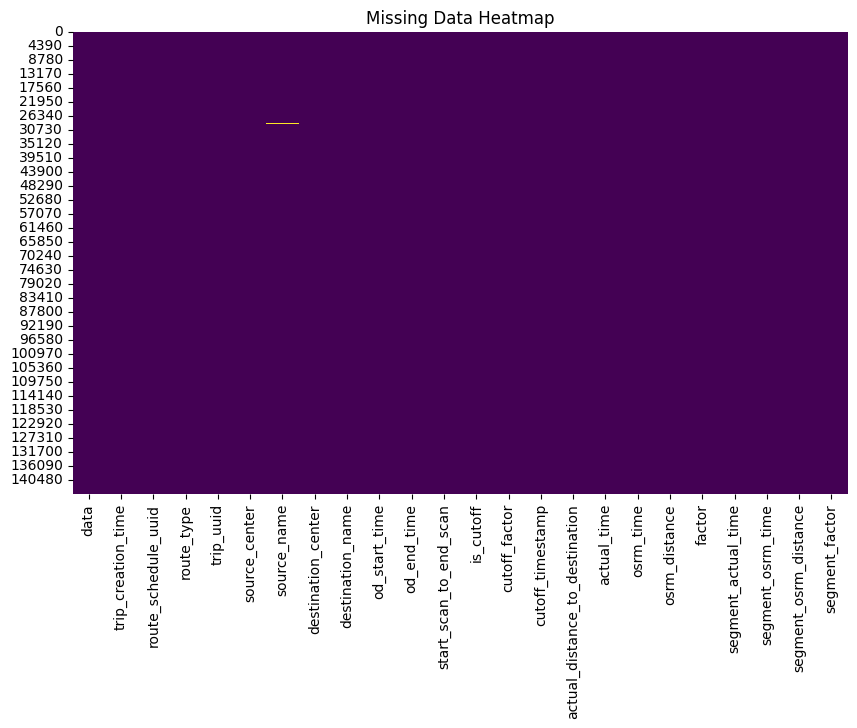

In [107]:
# Check for missing data using heatmap. Looks like we are good to go with missing data handling
missing_data = df.isnull().sum()

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [108]:
df['source_name'].fillna('not known', inplace=True)
df['destination_name'].fillna('not known', inplace=True)


In [109]:
df['source_states'] = df['source_name'].str.extract(r'\((.*?)\)')
df['destination_states'] = df['destination_name'].str.extract(r'\((.*?)\)')

In [110]:
df['source_cities'] = df['source_name'].str.extract(r'^([^_]+)')
df['destination_cities'] = df['destination_name'].str.extract(r'^([^_]+)')

In [111]:
# List of columns to be dropped
columns_to_drop = ['source_name', 'destination_name','route_schedule_uuid','trip_uuid']

# Drop the columns
df.drop(columns=columns_to_drop, inplace=True)

In [112]:
df['is_cutoff'].value_counts()

True     118749
False     26118
Name: is_cutoff, dtype: int64

In [113]:
df['route_type'].value_counts()

FTL        99660
Carting    45207
Name: route_type, dtype: int64

In [114]:
df[['od_start_time', 'od_end_time','trip_creation_time','cutoff_timestamp']] = df[['od_start_time', 'od_end_time','trip_creation_time','cutoff_timestamp']].apply(pd.to_datetime)

In [115]:
#hours difference between between trip creation and order start
df['delay_creation_start_hrs_diff'] = (df['od_start_time'] - df['trip_creation_time']).dt.total_seconds() / 3600
df['delay_creation_start_hrs_diff'] = df['delay_creation_start_hrs_diff'].round().astype(int)



In [116]:
#hours difference between cut-off and delivery time
df['delay_cutoff_delivery_hrs_diff'] = (df['cutoff_timestamp'] - df['od_end_time']).dt.total_seconds() / 3600
df['delay_cutoff_delivery_hrs_diff'] = df['delay_cutoff_delivery_hrs_diff'].round().astype(int)


In [117]:
# actualy delay in hours
df['delivery_hrs'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds() / 3600
df['delivery_hrs'] = df['delivery_hrs'].round().astype(int)

In [119]:
df.head()

,data,trip_creation_time,route_type,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_states,destination_states,source_cities,destination_cities,delay_creation_start_hrs_diff,delay_cutoff_delivery_hrs_diff,delivery_hrs
0,training,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Gujarat,Gujarat,Anand,Khambhat,1,0,1
1,training,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111,Gujarat,Gujarat,Anand,Khambhat,1,0,1
2,training,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714,Gujarat,Gujarat,Anand,Khambhat,1,-1,1
3,training,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000,Gujarat,Gujarat,Anand,Khambhat,1,-1,1
4,training,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000,Gujarat,Gujarat,Anand,Khambhat,1,-1,1


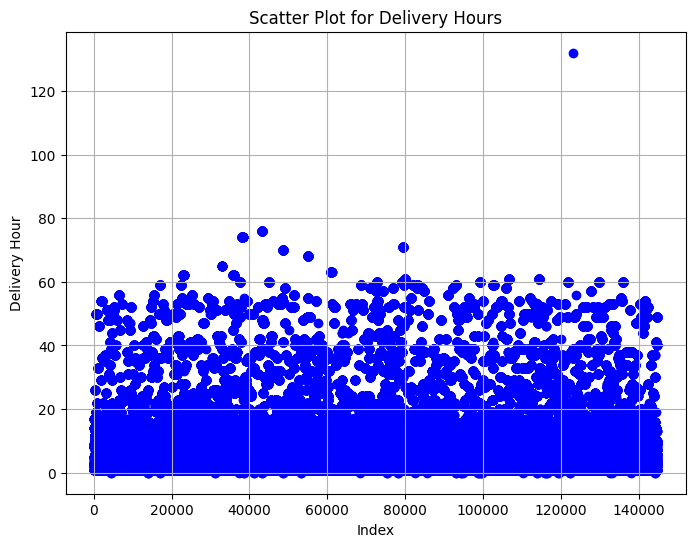

In [133]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df)), df['delivery_hrs'], color='blue')
plt.title('Scatter Plot for Delivery Hours')
plt.xlabel('Index')
plt.ylabel('Delivery Hour')
plt.grid(True)
plt.show()

In [136]:
filtered_df = df[df['delivery_hrs'] < 60]

# Count the number of rows that satisfy the condition
count_filtered_rows = filtered_df.shape[0]

print("Number of rows where delivery hours are less than 60:", count_filtered_rows)

Number of rows where delivery hours are less than 60: 143521


In [127]:
filtered_df = df[df['cutoff_factor'] < 10]
filtered_df.head(10)

,data,trip_creation_time,route_type,source_center,destination_center,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_states,destination_states,source_cities,destination_cities,delay_creation_start_hrs_diff,delay_cutoff_delivery_hrs_diff,delivery_hrs
0,training,2018-09-20 02:35:36.476840,Carting,IND388121AAA,IND388620AAB,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727,Gujarat,Gujarat,Anand,Khambhat,1,0,1
5,training,2018-09-20 02:35:36.476840,Carting,IND388620AAB,IND388320AAA,2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636,Gujarat,Gujarat,Khambhat,Anand,2,0,2
15,training,2018-09-14 15:42:46.437249,Carting,IND400011AAA,IND400072AAD,2018-09-14 15:42:46.437249,2018-09-14 17:31:45.368791,108.0,True,9,2018-09-14 16:29:54,9.355852,46.0,11.0,11.4344,4.181818,46.0,11.0,11.4344,4.181818,Maharashtra,Maharashtra,LowerParel,Mumbai,0,-1,2
40,training,2018-09-17 21:26:00.454695,Carting,IND562132AAA,IND560083AAB,2018-09-17 21:26:00.454695,2018-09-18 02:47:54.218733,321.0,True,9,2018-09-18 01:23:19,10.259661,15.0,15.0,14.1889,1.000000,15.0,15.0,14.1889,1.000000,Karnataka,Karnataka,Bangalore,Bengaluru,0,-1,5
44,training,2018-09-12 01:33:48.711350,Carting,IND362001AAA,IND362220AAA,2018-09-12 01:33:48.711350,2018-09-12 02:42:24.563892,68.0,True,9,2018-09-12 02:19:56,9.756514,15.0,14.0,14.1013,1.071429,15.0,14.0,14.1013,1.071429,Gujarat,Gujarat,Junagadh,Junagadh,0,0,1
48,training,2018-09-12 01:33:48.711350,Carting,IND362265AAA,IND362720AAA,2018-09-12 04:39:48.509733,2018-09-12 06:12:09.579013,92.0,True,9,2018-09-12 05:47:54,9.518243,16.0,9.0,13.0306,1.777778,16.0,9.0,13.0306,1.777778,Gujarat,Gujarat,Veraval,Kodinar,3,0,2
55,training,2018-09-12 01:33:48.711350,Carting,IND362560AAA,IND362150AAA,2018-09-12 07:19:24.177399,2018-09-12 09:26:45.211239,127.0,True,9,2018-09-12 08:53:55,9.996278,15.0,10.0,11.6241,1.500000,15.0,10.0,11.6241,1.500000,Gujarat,Gujarat,Una,Talala,6,-1,2
61,training,2018-09-12 01:33:48.711350,Carting,IND362150AAA,IND362001AAA,2018-09-12 09:26:45.211239,2018-09-12 11:26:24.365997,119.0,True,9,2018-09-12 10:59:56,10.246219,20.0,15.0,13.5150,1.333333,20.0,15.0,13.5150,1.333333,Gujarat,Gujarat,Talala,Junagadh,8,0,2
76,test,2018-09-27 14:16:14.819357,Carting,IND600056AAB,IND600032AAB,2018-09-27 14:16:14.819357,2018-09-27 17:16:11.083553,179.0,True,9,2018-09-27 15:59:36,9.285856,42.0,10.0,9.9365,4.200000,42.0,10.0,9.9365,4.200000,Tamil Nadu,Tamil Nadu,MAA,Chennai,0,-1,3
87,test,2018-09-28 21:11:40.693356,Carting,IND122004AAA,IND122413AAE,2018-09-28 21:11:40.693356,2018-09-28 23:03:42.274206,112.0,True,9,2018-09-28 22:18:25,9.870529,30.0,13.0,14.3221,2.307692,30.0,13.0,14.3221,2.307692,Haryana,Haryana,Gurgaon,Gurgaon,0,-1,2


In [124]:
filtered_df['delivery_hrs'].value_counts()

1     3705
2     3667
3     2132
4     1103
5      595
6      366
7      260
8      143
9       73
10      53
11      42
12      41
0       32
14      29
13      28
19      17
20      15
16      14
21      14
15      12
18      10
22      10
17       4
23       3
32       1
39       1
40       1
45       1
46       1
27       1
43       1
38       1
28       1
24       1
Name: delivery_hrs, dtype: int64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_type                      144867 non-null  object        
 3   source_center                   144867 non-null  object        
 4   destination_center              144867 non-null  object        
 5   od_start_time                   144867 non-null  datetime64[ns]
 6   od_end_time                     144867 non-null  datetime64[ns]
 7   start_scan_to_end_scan          144867 non-null  float64       
 8   is_cutoff                       144867 non-null  bool          
 9   cutoff_factor                   144867 non-null  int64         
 10  cutoff_timestamp                144867 non-null  datetim